# **I. Introduction**


Name : Monica M. Pratiwi
<br>
Batch : FTDS-016-RMT


## **Dataset**

In this task, the dataset is not from bigquery-public-data. The process to obtain the data is in the following instruction:

1. Log into Google BigQuery.
2. Use the information below as a place to retrieve data (use it as information for the FROM clause)
* Project ID : ftds-hacktiv8-project
* Dataset Name : phase1_ftds_016_rmt
* Table Name : credit-card-information
* Retrieve all data with column CUST_ID even.

In [ ]:
# The Query

# select*from `ftds-hacktiv8-project.phase1_ftds_016_rmt.credit-card-information` 
# where MOD(CUST_ID, 2) = 0 ORDER BY CUST_ID;

## **Objective**

Create a clustering model to perform Customer Segmentation from a bank's credit card data.

# **II. Import Libraries**

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

from numpy import array 
from scipy import stats

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from ast import Assign
from sklearn.mixture import GaussianMixture 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

import joblib
import json
import warnings
warnings.filterwarnings("ignore")

# **III. Data Loading**

The selected data is then saved under the name `h8dsft_P1G4_monica_pratiwi` in .csv format on Google Drive. Next, a dataframe is created using the data with the name `data`.

In [2]:
# Loading Dataset

data = pd.read_csv('/content/drive/MyDrive/bq-results-20221121-072603-1669016735963/h8dsft_P1G4_monica_pratiwi.csv')
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2,4613.570499,1.000000,0.00,0.00,0.00,1728.341939,0.000000,0.000000,0.000000,0.090909,1,0,6000.0,922.218961,1460.635220,0.00,11
1,4,2583.247881,1.000000,1337.35,45.65,1291.70,2484.594650,1.000000,0.083333,1.000000,0.500000,18,21,3000.0,819.792196,6404.855484,0.00,12
2,6,1597.911395,1.000000,0.00,0.00,0.00,162.919727,0.000000,0.000000,0.000000,0.250000,3,0,1800.0,548.420841,416.956325,0.00,12
3,8,3506.489102,1.000000,0.00,0.00,0.00,4467.382055,0.000000,0.000000,0.000000,1.000000,11,0,5000.0,286.708354,628.484562,0.00,6
4,10,2306.310095,1.000000,359.96,0.00,359.96,2843.482435,0.916667,0.000000,0.916667,0.333333,6,11,4000.0,1482.816136,2056.434829,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,8942,83.477053,0.181818,0.00,0.00,0.00,2654.856157,0.000000,0.000000,0.000000,0.083333,2,0,3000.0,12902.188130,1791.729021,0.50,12
4471,8944,8.404256,0.857143,0.00,0.00,0.00,132.266653,0.000000,0.000000,0.000000,0.285714,3,0,2500.0,206.851966,24.421074,0.25,7
4472,8946,4211.539631,1.000000,0.00,0.00,0.00,455.581546,0.000000,0.000000,0.000000,0.083333,1,0,10500.0,1288.287239,1164.178674,0.00,12
4473,8948,111.539712,1.000000,1364.86,0.00,1364.86,0.000000,0.916667,0.000000,0.833333,0.000000,0,11,4000.0,1500.447193,150.868096,0.20,12


After loading the dataset from Big Query that has been stored on Google Drive, the data is copied so that it has a backup. Next, a simple check is carried out on the columns in the dataset. The following is a description of the columns in the table.

Header | Notes
---|---
`CUST_ID` | Identification of credit card holder.
`BALANCE` | Balance amount left in their account to make purchases.
`BALANCE_FREQUENCY` | How frequently the balance is updated, score between 0 and 1 (1 = Frequently updated, 0 = Not Frequently updated).
`PURCHASES` | Amount of purchases made from account.
`ONEOFF_PURCHASES` | Maximum purchases amount done in one go.
`INSTALLMENT_PURCHASES` | Amount of purchases done in installment.
`CASH_ADVANCE` | Cash in advance given by the user.
`PURCHASES_FREQUENCY` | How frequently the purchases are being made, score between 0 and 1 (1 = Frequently updated, 0 = Not Frequently updated).
`ONEOFF_PURCHASES_FREQUENCY` | How frequently purchases are happening in one go, score between 0 and 1 (1 = Frequently updated, 0 = Not Frequently updated).
`PURCHASES_INSTALLMENT_FREQUENCY` | How frequently purchases in installments are being done, score between 0 and 1 (1 = Frequently updated, 0 = Not Frequently updated).
`CASH_ADVANCE_FREQUENCY` | How frequently the cash in advance being paid
`CASH_ADVANCE_TRX` | Number of transactions made with 'Cash in Advanced'
`PURCHASES_TRX` | Number of purchase transactions made
`CREDIT_LIMIT` | Limit credit card for user
`PAYMENTS` | Amount of payment done by user
`MINIMUM_PAYMENTS` | 
`PRC_FULL_PAYMENT` |
`TENURE` | 
<br>

In [ ]:
# Data Information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Based on the data information, all the information on the database is in numerical type. There are 18 columns and 4475 rows. Missing values found in `MINIMUN_PAYMENTS` column and `CREDIT_LIMIT` column.

In [ ]:
# Data Information

data.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4474.000000,4475.000000,4317.000000,4475.000000,4475.000000
mean,4476.000000,1565.743939,0.877608,1003.158324,588.504849,415.025075,973.453671,0.490122,0.202614,0.364989,0.134156,3.196425,14.490503,4494.020175,1726.212274,854.429538,0.157206,11.516425
std,2583.931114,2091.205727,0.235604,2210.812899,1666.500287,927.360842,2133.464502,0.399874,0.298502,0.397336,0.199221,6.500169,24.156038,3668.535689,2961.258570,2306.411178,0.295869,1.347819
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000
25%,2239.000000,132.536353,0.888889,40.065000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,390.206371,169.814310,0.000000,12.000000
50%,4476.000000,874.905296,1.000000,362.480000,29.990000,89.450000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,831.048408,309.854995,0.000000,12.000000
75%,6713.000000,2058.519163,1.000000,1122.640000,580.320000,484.255000,1098.569962,0.916667,0.333333,0.750000,0.181818,4.000000,17.000000,6000.000000,1895.959003,830.395060,0.166667,12.000000
max,8950.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,29282.109150,1.000000,1.000000,1.000000,1.166667,110.000000,358.000000,30000.000000,46930.598240,61031.618600,1.000000,12.000000


In [ ]:
# Make a copy of data

data_2=data.copy()

In [ ]:
# Columns with answer between 0 (Not updated) and 1 (Frequently updated)

data.iloc[:, 7:11]

,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY
0,0.000000,0.000000,0.000000,0.090909
1,1.000000,0.083333,1.000000,0.500000
2,0.000000,0.000000,0.000000,0.250000
3,0.000000,0.000000,0.000000,1.000000
4,0.916667,0.000000,0.916667,0.333333
...,...,...,...,...
4470,0.000000,0.000000,0.000000,0.083333
4471,0.000000,0.000000,0.000000,0.285714
4472,0.000000,0.000000,0.000000,0.083333
4473,0.916667,0.000000,0.833333,0.000000


# **IV. Exploratory Data Analysis (EDA)**

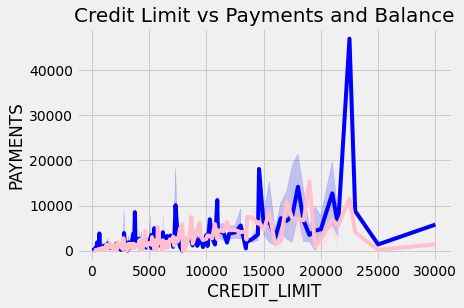

In [ ]:
# Credit Limit vs Payments and Balance

x = data['CREDIT_LIMIT']
y = data['PAYMENTS']
z = data['BALANCE']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Credit Limit vs Payments and Balance', fontsize = 20)
plt.show()

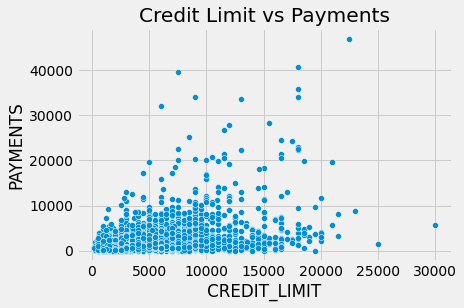

In [ ]:
# Make Scatterplot
sns.scatterplot(data=data, x="CREDIT_LIMIT", y="PAYMENTS")
plt.title('Credit Limit vs Payments')
plt.show()

Most customers have credit limits between 0 and 15000 and make payments according to their credit limits. There are some customers who have a credit limit that is quite large and a small payment value which may indicate that the customer does not use a credit card as their main means of payment.

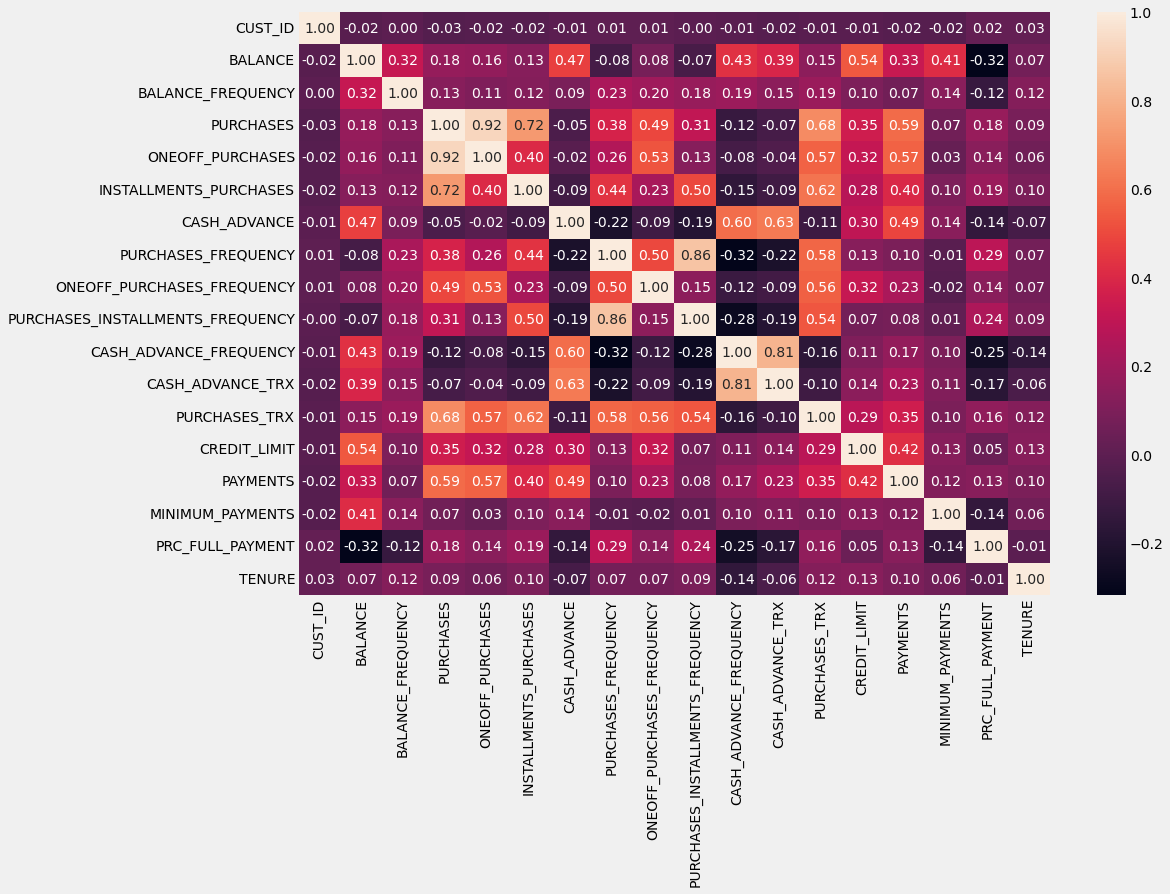

CPU times: user 2.68 s, sys: 246 ms, total: 2.93 s
Wall time: 3.72 s


In [ ]:
%%time
# Heatmap Correlation Matrix

plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.show()

Based on the heatmap above, the correlations between columns vary. Among the high correlations between columns are <br>
`PURCHASE` with `ONEOFF_PURCHASE`, <br>
`PURCHASE_FREQUENCY` with `PURCHASE_INSTALLMENT_FREQUENCY`, <br>
and `CASH_ADVANCE_TRX` with `CASH_ADVANCE_FREQUENCY`. 
<br>
<br>
There are also columns that have almost no correlation at all like `PURCHASE_INSTALLMENT_FREQUENCY` with `MINIMUM_PAYMENT` with a correlation value of 0.01. 
<br>
<br>
One of the opposite correlations was found between the `BALANCE` and `PRC_FULL_PAYMENT` columns.

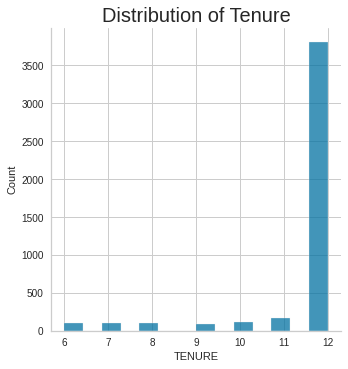

In [5]:
# Distribution of Tenure

plt.rcParams['figure.figsize'] = (15, 10)
sns.displot(data['TENURE'], palette = 'hsv')
plt.title('Distribution of Tenure', fontsize = 20)
plt.show()

Tenure is spread between 6-12 and Most customers have a tenure of 12.

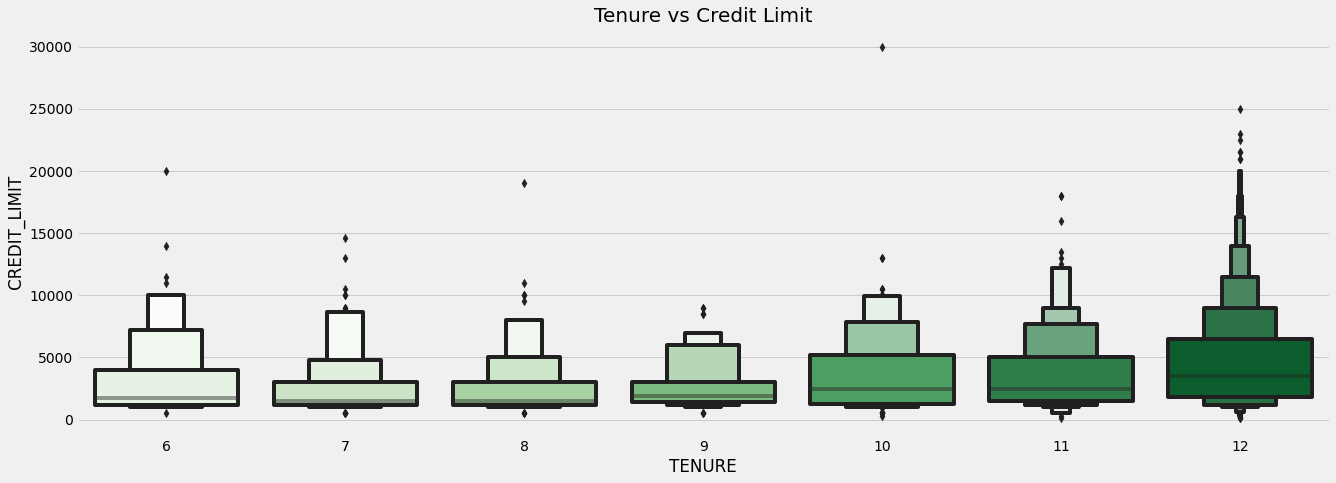

In [ ]:
#  Tenure vs Credit Limit

plt.rcParams['figure.figsize'] = (20, 7)
sns.boxenplot(data['TENURE'], data['CREDIT_LIMIT'], palette = 'Greens')
plt.title('Tenure vs Credit Limit', fontsize = 20)
plt.show()

Most customers have a tenure of 12 with the highest credit limit reaching 25,000. However, this value is not the largest credit limit value because the largest value is with the customer with a tenure of 10.

# **V. Data Preprocessing**

## **Get data for Model Inference, Define Features, Splitting between Train-Set & Test-Set**

In [3]:
# Get data for model inference

data_inference = data.sample(15, random_state=1993)

In [4]:
# Remove inference set from dataset

data_train_test = data.drop(data_inference.index)

In [5]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inference.reset_index(drop=True, inplace=True)

In [6]:
# Define Features `X ` and Splitting between Train-Set & Test-Set

X = data_train_test

## **Outlier Handling**

In [7]:
# Get columns name
X.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

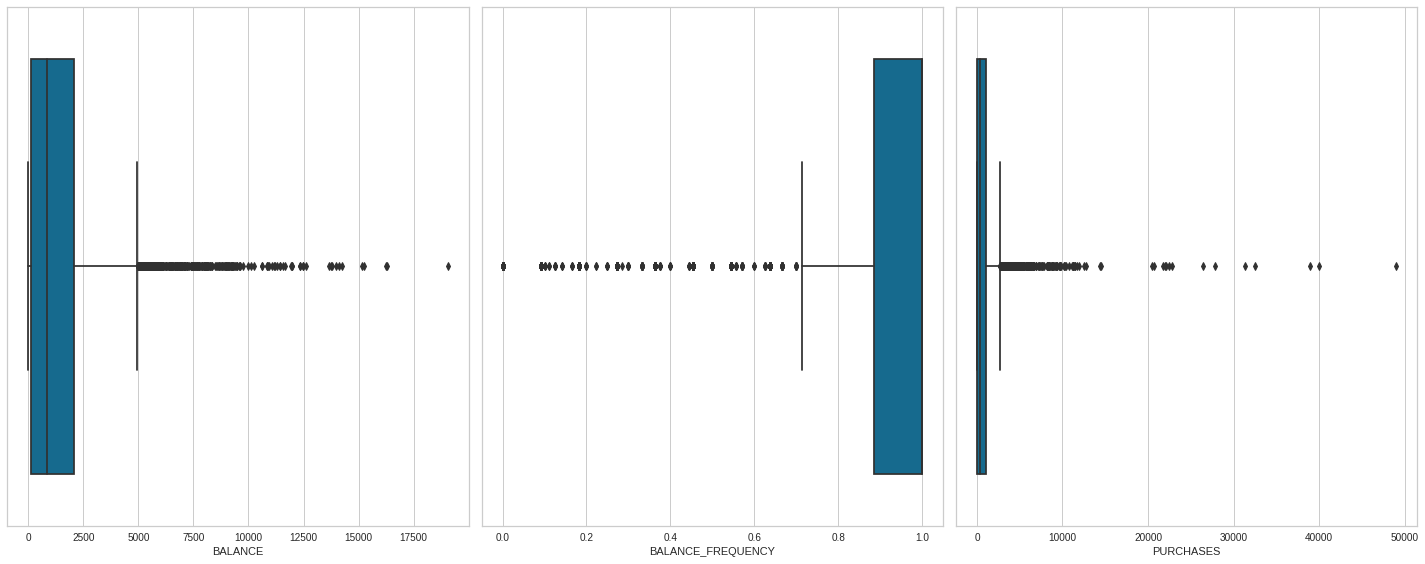

In [79]:
# Distribution plots for 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES'

plt.figure(figsize = (20, 8))
plotnumber = 1

for col in (['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES']):
    if plotnumber <= 3:
        ax = plt.subplot(1, 3, plotnumber)
        sns.boxplot(X[col])
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

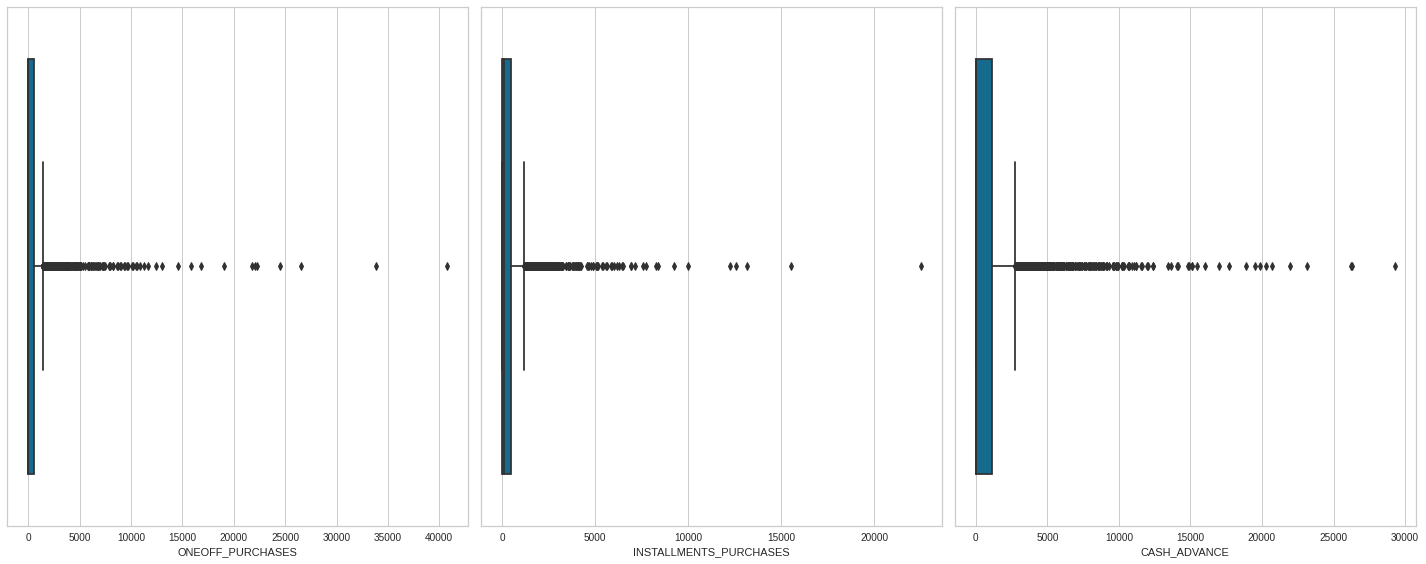

In [80]:
# Distribution plots for 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE' 

plt.figure(figsize = (20, 8))
plotnumber = 1

for col in (['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE']):
    if plotnumber <= 3:
        ax = plt.subplot(1, 3, plotnumber)
        sns.boxplot(X[col])
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

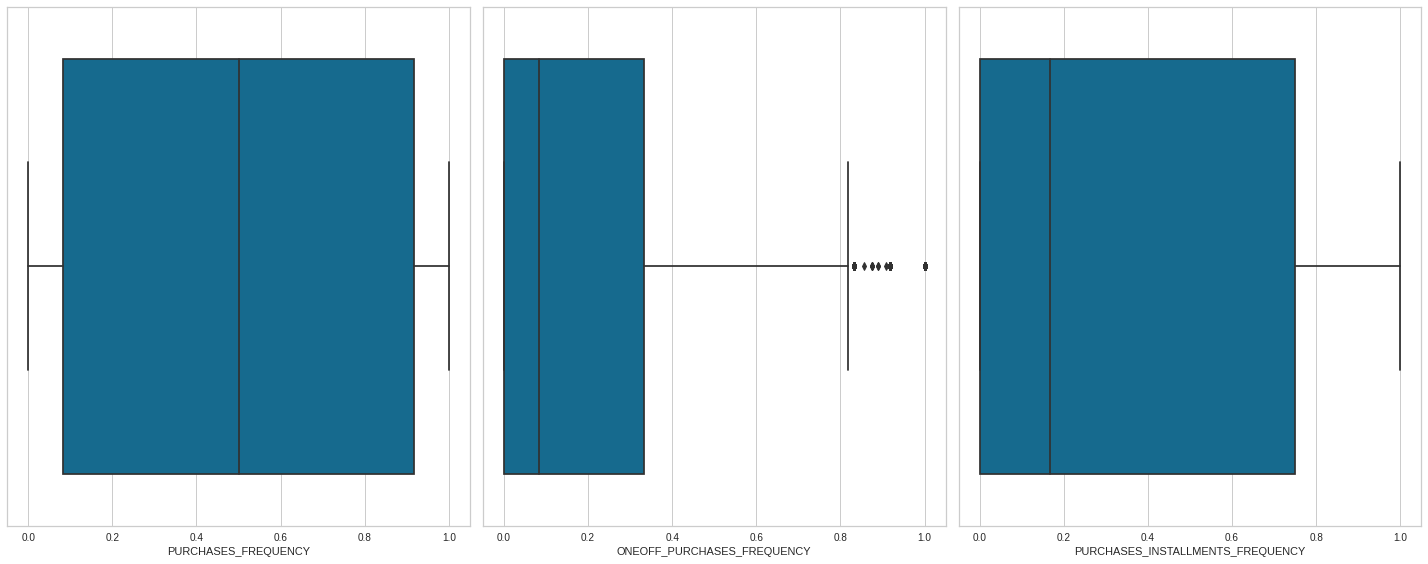

In [13]:
# Distribution plots for 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY'

plt.figure(figsize = (20, 8))
plotnumber = 1

for col in (['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']):
    if plotnumber <= 3:
        ax = plt.subplot(1, 3, plotnumber)
        sns.boxplot(X[col])
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

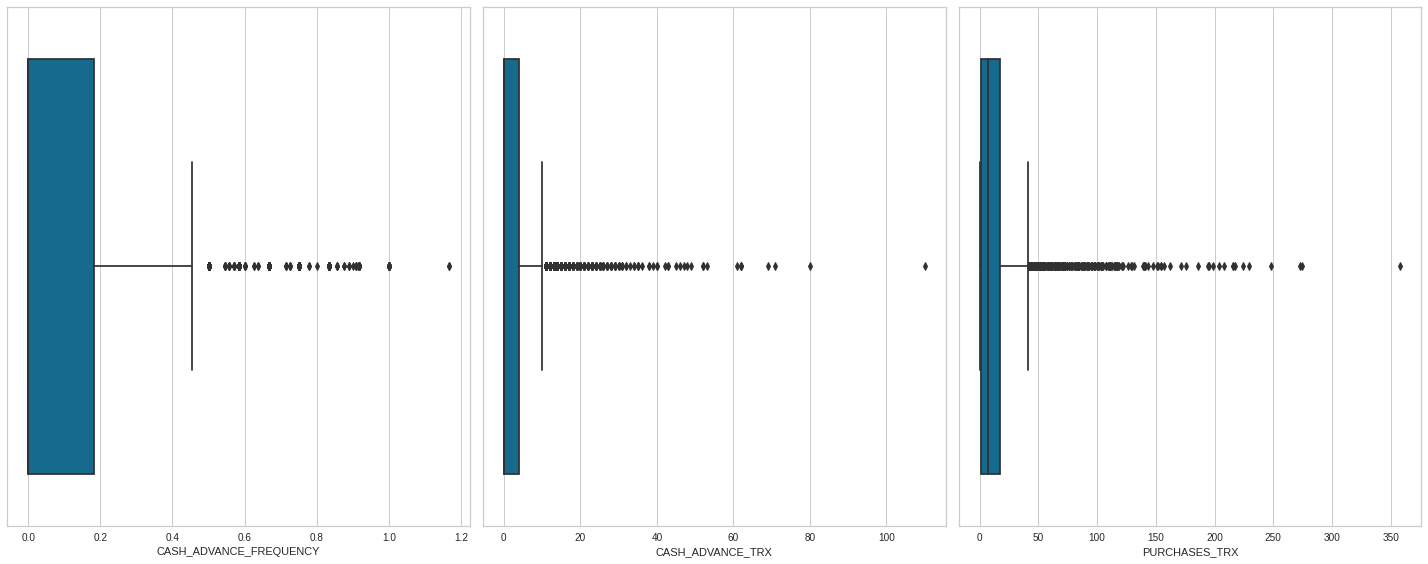

In [14]:
# Distribution plots for 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX'

plt.figure(figsize = (20, 8))
plotnumber = 1

for col in (['CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',]):
    if plotnumber <= 3:
        ax = plt.subplot(1, 3, plotnumber)
        sns.boxplot(X[col])
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

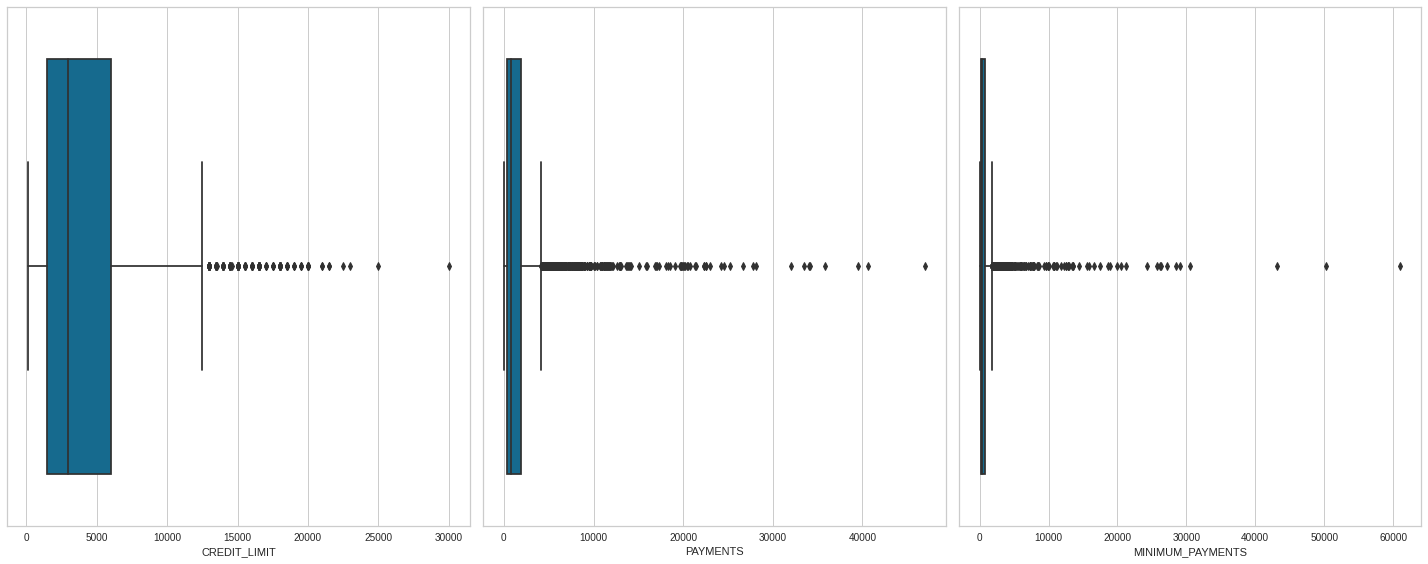

In [15]:
# Distribution plots for 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS'

plt.figure(figsize = (20, 8))
plotnumber = 1

for col in (['CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']):
    if plotnumber <= 3:
        ax = plt.subplot(1, 3, plotnumber)
        sns.boxplot(X[col])
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

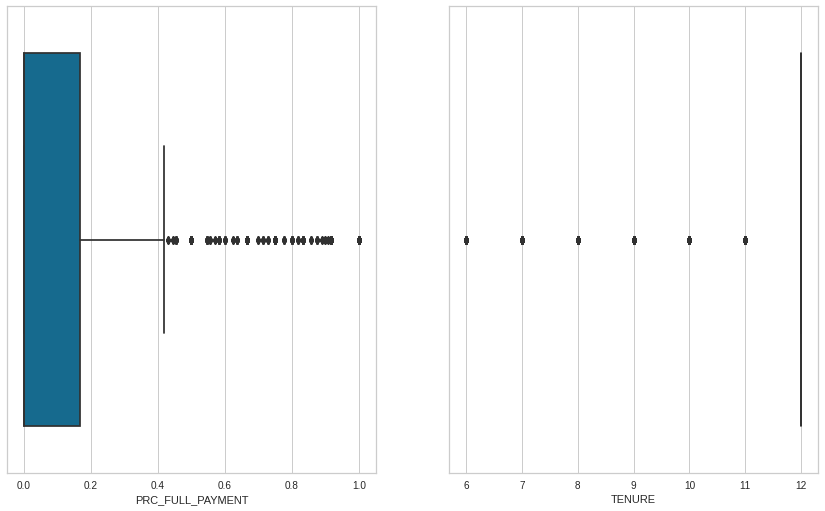

In [16]:
# Distribution plots for 'PRC_FULL_PAYMENT', 'TENURE'

plt.figure(figsize = (20, 8))
plotnumber = 1

for col in (['PRC_FULL_PAYMENT', 'TENURE']):
    if plotnumber <= 3:
        ax = plt.subplot(1, 3, plotnumber)
        sns.boxplot(X[col])
        
    plotnumber += 1
    

plt.show()

## **Handling Missing Values**

In [8]:
# Check Missing Values `X`

X.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
# Impute the missing values with median

X['MINIMUM_PAYMENTS'].fillna(X['MINIMUM_PAYMENTS'].median(), inplace=True)
X['CREDIT_LIMIT'].fillna(X['CREDIT_LIMIT'].median(), inplace=True)

In [19]:
# Check info of `X` after imputation

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4460 entries, 0 to 4459
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4460 non-null   int64  
 1   BALANCE                           4460 non-null   float64
 2   BALANCE_FREQUENCY                 4460 non-null   float64
 3   PURCHASES                         4460 non-null   float64
 4   ONEOFF_PURCHASES                  4460 non-null   float64
 5   INSTALLMENTS_PURCHASES            4460 non-null   float64
 6   CASH_ADVANCE                      4460 non-null   float64
 7   PURCHASES_FREQUENCY               4460 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4460 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4460 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4460 non-null   float64
 11  CASH_ADVANCE_TRX                  4460 non-null   int64  
 12  PURCHA

## **Feature Selection**

In [10]:
# Drop `CUST_ID` because it is presumed to be unrelated

X.drop('CUST_ID', axis=1, inplace=True)
X

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4613.570499,1.000000,0.00,0.00,0.00,1728.341939,0.000000,0.000000,0.000000,0.090909,1,0,6000.0,922.218961,1460.635220,0.00,11
1,2583.247881,1.000000,1337.35,45.65,1291.70,2484.594650,1.000000,0.083333,1.000000,0.500000,18,21,3000.0,819.792196,6404.855484,0.00,12
2,1597.911395,1.000000,0.00,0.00,0.00,162.919727,0.000000,0.000000,0.000000,0.250000,3,0,1800.0,548.420841,416.956325,0.00,12
3,3506.489102,1.000000,0.00,0.00,0.00,4467.382055,0.000000,0.000000,0.000000,1.000000,11,0,5000.0,286.708354,628.484562,0.00,6
4,2306.310095,1.000000,359.96,0.00,359.96,2843.482435,0.916667,0.000000,0.916667,0.333333,6,11,4000.0,1482.816136,2056.434829,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4455,83.477053,0.181818,0.00,0.00,0.00,2654.856157,0.000000,0.000000,0.000000,0.083333,2,0,3000.0,12902.188130,1791.729021,0.50,12
4456,8.404256,0.857143,0.00,0.00,0.00,132.266653,0.000000,0.000000,0.000000,0.285714,3,0,2500.0,206.851966,24.421074,0.25,7
4457,4211.539631,1.000000,0.00,0.00,0.00,455.581546,0.000000,0.000000,0.000000,0.083333,1,0,10500.0,1288.287239,1164.178674,0.00,12
4458,111.539712,1.000000,1364.86,0.00,1364.86,0.000000,0.916667,0.000000,0.833333,0.000000,0,11,4000.0,1500.447193,150.868096,0.20,12


## **Column Type**

In [11]:
# Get Numerical Columns and Categorical Columns

numerical = X.select_dtypes(include=np.number).columns.tolist()
categorical = X.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns   : ', numerical)
print('Categorical Columns : ', categorical)

Numerical Columns   :  ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
Categorical Columns :  []


In [12]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X[numerical]
X_test_num = X[numerical]

X_train_num

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4613.570499,1.000000,0.00,0.00,0.00,1728.341939,0.000000,0.000000,0.000000,0.090909,1,0,6000.0,922.218961,1460.635220,0.00,11
1,2583.247881,1.000000,1337.35,45.65,1291.70,2484.594650,1.000000,0.083333,1.000000,0.500000,18,21,3000.0,819.792196,6404.855484,0.00,12
2,1597.911395,1.000000,0.00,0.00,0.00,162.919727,0.000000,0.000000,0.000000,0.250000,3,0,1800.0,548.420841,416.956325,0.00,12
3,3506.489102,1.000000,0.00,0.00,0.00,4467.382055,0.000000,0.000000,0.000000,1.000000,11,0,5000.0,286.708354,628.484562,0.00,6
4,2306.310095,1.000000,359.96,0.00,359.96,2843.482435,0.916667,0.000000,0.916667,0.333333,6,11,4000.0,1482.816136,2056.434829,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4455,83.477053,0.181818,0.00,0.00,0.00,2654.856157,0.000000,0.000000,0.000000,0.083333,2,0,3000.0,12902.188130,1791.729021,0.50,12
4456,8.404256,0.857143,0.00,0.00,0.00,132.266653,0.000000,0.000000,0.000000,0.285714,3,0,2500.0,206.851966,24.421074,0.25,7
4457,4211.539631,1.000000,0.00,0.00,0.00,455.581546,0.000000,0.000000,0.000000,0.083333,1,0,10500.0,1288.287239,1164.178674,0.00,12
4458,111.539712,1.000000,1364.86,0.00,1364.86,0.000000,0.916667,0.000000,0.833333,0.000000,0,11,4000.0,1500.447193,150.868096,0.20,12


## **Feature Scaling**

Because there is no outlier handling, the data are skewed. So, MinMaxScaler is used for feature scaling

In [13]:
# Feature Scaling

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[2.42269439e-01, 1.00000000e+00, 0.00000000e+00, ...,
        2.39318310e-02, 0.00000000e+00, 8.33333333e-01],
       [1.35652423e-01, 1.00000000e+00, 2.72708346e-02, ...,
        1.04942681e-01, 0.00000000e+00, 1.00000000e+00],
       [8.39100860e-02, 1.00000000e+00, 0.00000000e+00, ...,
        6.83119420e-03, 0.00000000e+00, 1.00000000e+00],
       ...,
       [2.21157853e-01, 1.00000000e+00, 0.00000000e+00, ...,
        1.90744024e-02, 0.00000000e+00, 1.00000000e+00],
       [5.85721265e-03, 1.00000000e+00, 2.78318101e-02, ...,
        2.47134926e-03, 2.00000000e-01, 1.00000000e+00],
       [1.54533360e-02, 1.00000000e+00, 4.05794749e-04, ...,
        2.85983464e-03, 0.00000000e+00, 1.00000000e+00]])

In [14]:
# DataFrame of scaled feature

X_final_df = pd.DataFrame(X_scaled)
X_final_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.242269,1.000000,0.000000,0.000000,0.000000,0.059024,0.000000,0.000000,0.000000,0.077922,0.009091,0.000000,0.195980,0.019651,0.023932,0.00,0.833333
1,0.135652,1.000000,0.027271,0.001120,0.057409,0.084850,1.000000,0.083333,1.000000,0.428571,0.163636,0.058659,0.095477,0.017468,0.104943,0.00,1.000000
2,0.083910,1.000000,0.000000,0.000000,0.000000,0.005564,0.000000,0.000000,0.000000,0.214286,0.027273,0.000000,0.055276,0.011686,0.006831,0.00,1.000000
3,0.184134,1.000000,0.000000,0.000000,0.000000,0.152564,0.000000,0.000000,0.000000,0.857143,0.100000,0.000000,0.162479,0.006109,0.010297,0.00,0.000000
4,0.121110,1.000000,0.007340,0.000000,0.015998,0.097106,0.916667,0.000000,0.916667,0.285714,0.054545,0.030726,0.128978,0.031596,0.033694,0.00,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4455,0.004384,0.181818,0.000000,0.000000,0.000000,0.090665,0.000000,0.000000,0.000000,0.071428,0.018182,0.000000,0.095477,0.274921,0.029357,0.50,1.000000
4456,0.000441,0.857143,0.000000,0.000000,0.000000,0.004517,0.000000,0.000000,0.000000,0.244898,0.027273,0.000000,0.078727,0.004408,0.000400,0.25,0.166667
4457,0.221158,1.000000,0.000000,0.000000,0.000000,0.015558,0.000000,0.000000,0.000000,0.071428,0.009091,0.000000,0.346734,0.027451,0.019074,0.00,1.000000
4458,0.005857,1.000000,0.027832,0.000000,0.060660,0.000000,0.916667,0.000000,0.833333,0.000000,0.000000,0.030726,0.128978,0.031972,0.002471,0.20,1.000000


## **Dimensionality Reduction**

In [15]:
# PCA to reduce dimensionality

pca=PCA(n_components=8)
reduced_data=pca.fit_transform(X_scaled)

# **VI. K-Means**

## **With PCA**

In [16]:
# Function to Define the Model

k_inertia=[]

for i in range(1, 11):
    km=KMeans(n_clusters=i, n_init=10, init='k-means++')
    km.fit(reduced_data)
    k_inertia.append(km.inertia_)

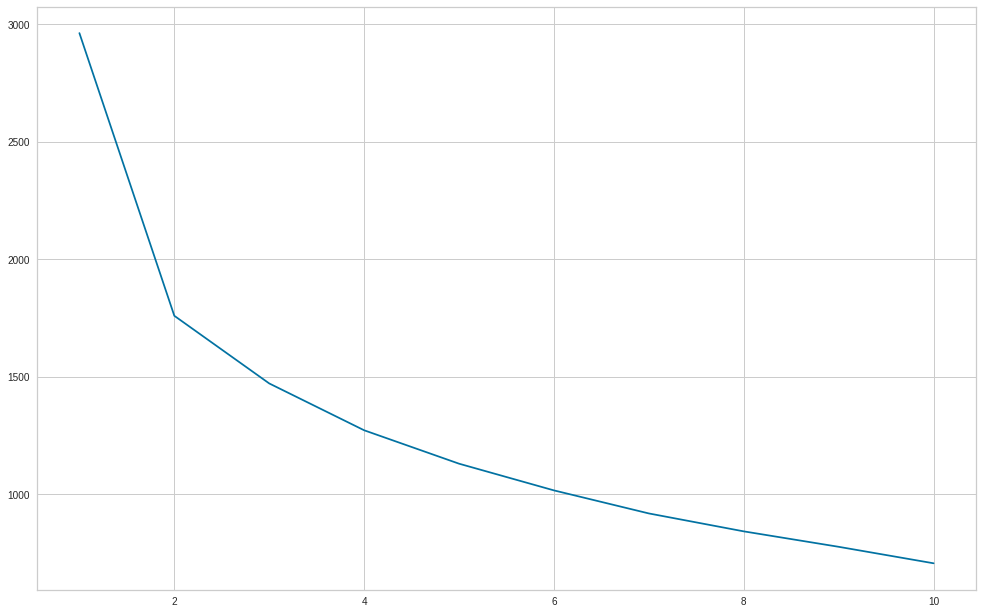

In [27]:
# Plotting the elbow
plt.plot(range(1,11), k_inertia)

The 'elbow' indentation at the value x=2 on the graph indicates the number of clusters of 2 is considered the ideal number.

In [17]:
# Make cluster

km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(reduced_data)
y_means = km.predict(reduced_data)

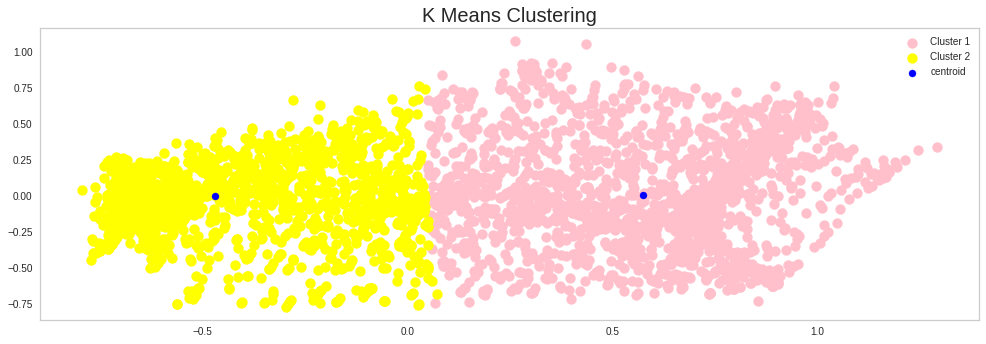

In [23]:
# Plot clustering result

plt.scatter(reduced_data[y_means == 0, 0], reduced_data[y_means == 0, 1], s = 100, c = 'pink', label = 'Cluster 1')
plt.scatter(reduced_data[y_means == 1, 0], reduced_data[y_means == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centroid')

plt.title('K Means Clustering', fontsize = 20)

plt.legend()
plt.grid()
plt.show()

In [24]:
# Get label array

km.labels_

array([1, 0, 1, ..., 1, 0, 1], dtype=int32)

In [25]:
# Concate clusterred data and dataset

y_means1= pd.DataFrame(y_means)
df_km = pd.concat([data, y_means1], axis=1)
df_km = df_km.rename(columns = {0:"Clusters"})
df_km.head() 

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
0,2,4613.570499,1.0,0.00,0.00,0.00,1728.341939,0.000000,0.000000,0.000000,0.090909,1,0,6000.0,922.218961,1460.635220,0.0,11,1.0
1,4,2583.247881,1.0,1337.35,45.65,1291.70,2484.594650,1.000000,0.083333,1.000000,0.500000,18,21,3000.0,819.792196,6404.855484,0.0,12,0.0
2,6,1597.911395,1.0,0.00,0.00,0.00,162.919727,0.000000,0.000000,0.000000,0.250000,3,0,1800.0,548.420841,416.956325,0.0,12,1.0
3,8,3506.489102,1.0,0.00,0.00,0.00,4467.382055,0.000000,0.000000,0.000000,1.000000,11,0,5000.0,286.708354,628.484562,0.0,6,1.0
4,10,2306.310095,1.0,359.96,0.00,359.96,2843.482435,0.916667,0.000000,0.916667,0.333333,6,11,4000.0,1482.816136,2056.434829,0.0,12,0.0


In [32]:
# Calculate the score

score = silhouette_score(reduced_data, km.labels_, metric='euclidean')
print('Silhouette score: %.3f' % score)

Silhouette score: 0.383


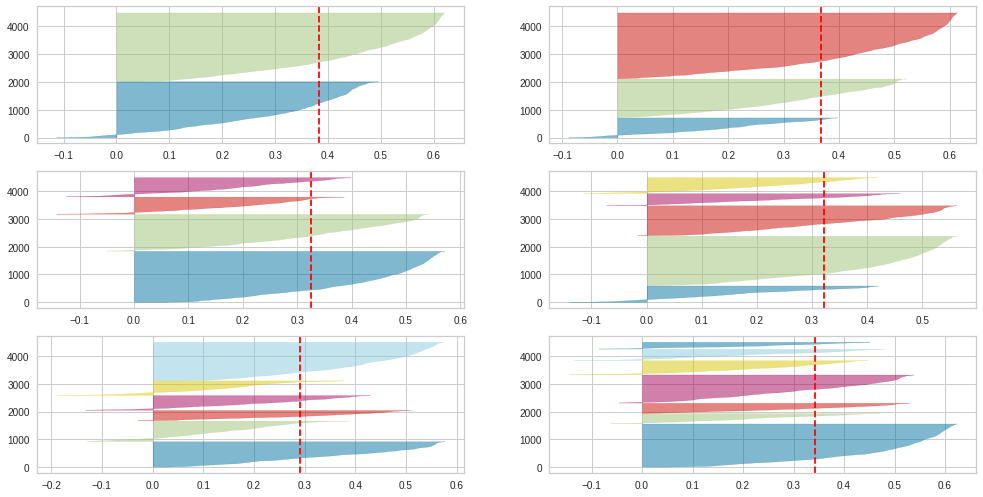

In [33]:
# Visualize Silhouette Score

fig, ax = plt.subplots(3, 2, figsize = (15,8))
for i in np.arange(2,8):
  km = KMeans(n_clusters = i, init="k-means++", n_init = 10, max_iter = 100, random_state = 99)
  q, mod = divmod(i,2)

  visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax = ax[q-1][mod])
  visualizer.fit(reduced_data)

The results of the silhouette score which shows the number 0.38 can indicate the model is not good enough in classifying customer segmentation. The comparison of the silhouettes shown in the figure above shows that customers grouped into 2 and 3 clusters have the highest silhouette values, with the data distribution in the 2 clusters being larger than 3 clusters.

## **Multidimension (Without PCA)**

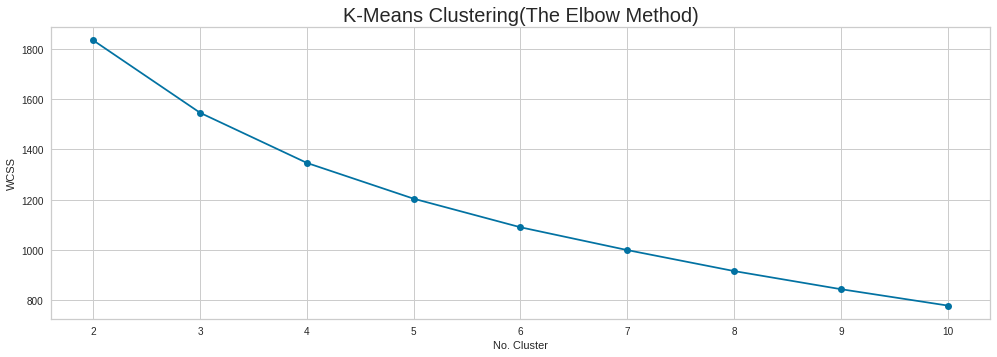

In [18]:
# Elbow Method for `X_scaled` without PCA

wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(2, 11), wcss, marker ="o")
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('No. Cluster')
plt.ylabel('WCSS')
plt.show()

In [19]:
# Make cluster

km2 = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km2.fit(X_scaled)
y_kmm = km2.predict(X_scaled)

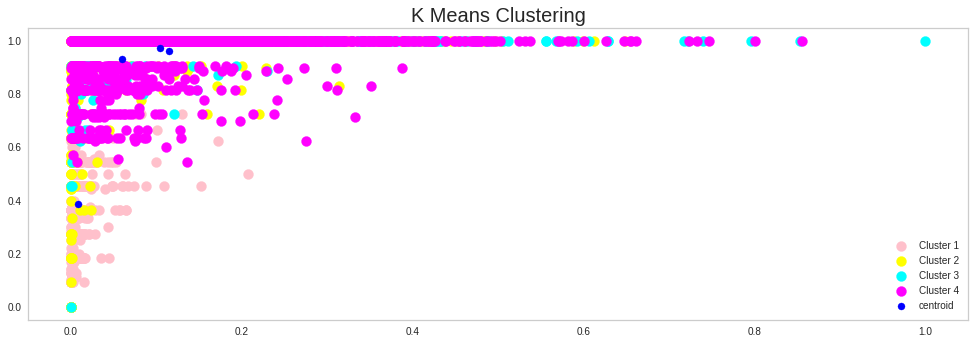

In [21]:
# Plotting clustering result

plt.scatter(X_scaled[y_kmm == 0, 0], X_scaled[y_kmm == 0, 1], s = 100, c = 'pink', label = 'Cluster 1')
plt.scatter(X_scaled[y_kmm == 1, 0], X_scaled[y_kmm == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(X_scaled[y_kmm == 2, 0], X_scaled[y_kmm == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(X_scaled[y_kmm == 3, 0], X_scaled[y_kmm == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centroid')

plt.title('K Means Clustering', fontsize = 20)

plt.legend()
plt.grid()
plt.show()

In [26]:
# Concate clusterred data and dataset

y_y_kmm1= pd.DataFrame(y_kmm)
df_kmm = pd.concat([data, y_means1], axis=1)
df_kmm = df_kmm.rename(columns = {0:"Clusters"})
df_kmm.head() 

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
0,2,4613.570499,1.0,0.00,0.00,0.00,1728.341939,0.000000,0.000000,0.000000,0.090909,1,0,6000.0,922.218961,1460.635220,0.0,11,1.0
1,4,2583.247881,1.0,1337.35,45.65,1291.70,2484.594650,1.000000,0.083333,1.000000,0.500000,18,21,3000.0,819.792196,6404.855484,0.0,12,0.0
2,6,1597.911395,1.0,0.00,0.00,0.00,162.919727,0.000000,0.000000,0.000000,0.250000,3,0,1800.0,548.420841,416.956325,0.0,12,1.0
3,8,3506.489102,1.0,0.00,0.00,0.00,4467.382055,0.000000,0.000000,0.000000,1.000000,11,0,5000.0,286.708354,628.484562,0.0,6,1.0
4,10,2306.310095,1.0,359.96,0.00,359.96,2843.482435,0.916667,0.000000,0.916667,0.333333,6,11,4000.0,1482.816136,2056.434829,0.0,12,0.0


In [38]:
# Calculate the score

score = silhouette_score(X_scaled, km.labels_, metric='euclidean')
print('Silhouette score: %.3f' % score)

Silhouette score: 0.315


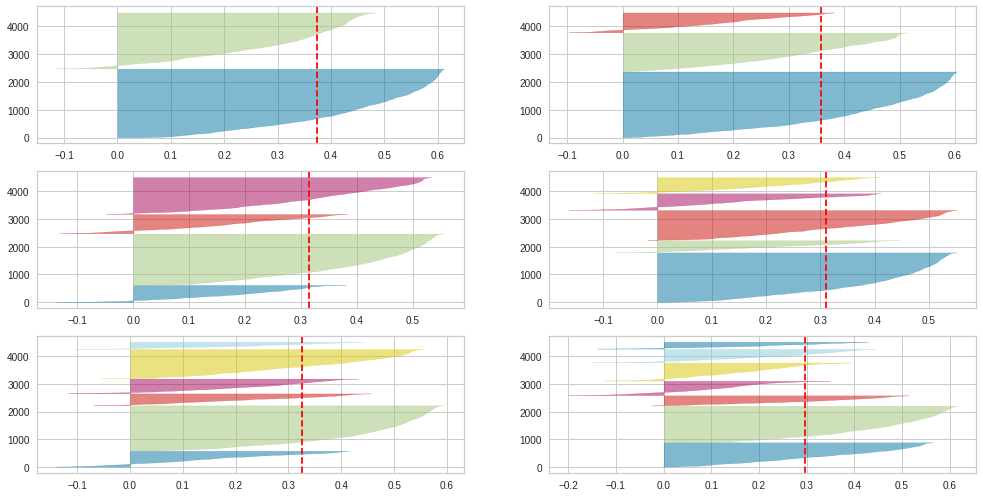

In [39]:
# Visualize Silhouette Score

fig, ax = plt.subplots(3, 2, figsize = (15,8))
for i in np.arange(2,8):
  km = KMeans(n_clusters = i, init="k-means++", n_init = 10, max_iter = 100, random_state = 2)
  q, mod = divmod(i,2)

  visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax = ax[q-1][mod])
  visualizer.fit(X_scaled)

# **VII. Agglomerative Clustering**

In [27]:
# Define and Train the Model

agg_clust = AgglomerativeClustering(n_clusters=4)
assigned_clusters = agg_clust.fit_predict(reduced_data)

In [28]:
# Concate clusterred data and dataset

assigned_clusters1= pd.DataFrame(assigned_clusters)
df_agg = pd.concat([data, assigned_clusters1], axis=1)
df_agg = df_agg.rename(columns = {0:"Clusters"})
df_agg.head() 

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
0,2,4613.570499,1.0,0.00,0.00,0.00,1728.341939,0.000000,0.000000,0.000000,0.090909,1,0,6000.0,922.218961,1460.635220,0.0,11,0.0
1,4,2583.247881,1.0,1337.35,45.65,1291.70,2484.594650,1.000000,0.083333,1.000000,0.500000,18,21,3000.0,819.792196,6404.855484,0.0,12,1.0
2,6,1597.911395,1.0,0.00,0.00,0.00,162.919727,0.000000,0.000000,0.000000,0.250000,3,0,1800.0,548.420841,416.956325,0.0,12,0.0
3,8,3506.489102,1.0,0.00,0.00,0.00,4467.382055,0.000000,0.000000,0.000000,1.000000,11,0,5000.0,286.708354,628.484562,0.0,6,0.0
4,10,2306.310095,1.0,359.96,0.00,359.96,2843.482435,0.916667,0.000000,0.916667,0.333333,6,11,4000.0,1482.816136,2056.434829,0.0,12,1.0


In [29]:
# Calculate the score

score = silhouette_score(reduced_data, agg_clust.labels_, metric='euclidean')
print('Silhouette score: %.3f' % score)

Silhouette score: 0.309


# **VIII. Gaussian Mixture**

In [30]:
# Predict using Gaussian Mixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=15)
gm.fit(reduced_data)

GaussianMixture(n_components=3, n_init=10, random_state=15)

In [31]:
# Predict as `Hard Clustering`

gm.predict(reduced_data)

array([1, 0, 1, ..., 1, 0, 1])

In [32]:
# Predict as `Soft Clustering`

gm.predict_proba(reduced_data)

array([[0.00000000e+00, 9.99999830e-01, 1.70269652e-07],
       [9.99993711e-01, 0.00000000e+00, 6.28926533e-06],
       [1.25830178e-03, 9.98741662e-01, 3.64059821e-08],
       ...,
       [1.36564184e-02, 9.86343372e-01, 2.09233517e-07],
       [9.99930444e-01, 0.00000000e+00, 6.95561767e-05],
       [3.49825647e-03, 9.96501652e-01, 9.12213252e-08]])

# **IX. Model Inference**

In [41]:
# Save the Files

import joblib
import json

with open('model_pca.pkl', 'wb') as file_1:
  joblib.dump(pca, file_1)

with open('model_kmeans.pkl', 'wb') as file_2:
  joblib.dump(km, file_2)

with open('model_agglo.pkl', 'wb') as file_3:
  joblib.dump(agg_clust, file_3)

with open('model_gaussian.pkl', 'wb') as file_4:
  joblib.dump(gm, file_4)

with open('model_scaler.pkl', 'wb') as file_5:
  joblib.dump(scaler, file_5)

with open('list_num_cols.txt', 'w') as file_6:
  json.dump(numerical, file_6)

In [42]:
# Load All Files

import joblib
import json

with open('model_pca.pkl', 'rb') as file_1:
  pca = joblib.load(file_1)

with open('model_kmeans.pkl', 'rb') as file_2:
  km = joblib.load(file_2)

with open('model_agglo.pkl', 'rb') as file_3:
  agg_clust = joblib.load(file_3)

with open('model_gaussian.pkl', 'rb') as file_4:
  gm = joblib.load(file_4)

with open('model_scaler.pkl', 'rb') as file_5:
  scaler = joblib.load(file_5)

with open('list_num_cols.txt', 'r') as file_6:
  numerical = json.load(file_6)

In [43]:
# Split between Numerical Columns and Categorical Columns

data_inf_num = data_inference[numerical]

data_inf_num.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,82.784219,0.363636,431.28,431.28,0.00,0.000000,0.083333,0.083333,0.00,0.000000,0,1,3000.0,734.818798,173.255235,0.000000,12
1,4228.417754,1.000000,11994.71,11994.71,0.00,496.521561,0.250000,0.250000,0.00,0.083333,2,8,13450.0,508.797444,1725.645623,0.000000,12
2,285.645503,1.000000,1265.24,893.54,371.70,0.000000,0.833333,0.500000,0.50,0.000000,0,24,7000.0,1791.285108,197.065604,0.083333,12
3,1121.068043,1.000000,0.00,0.00,0.00,56.461201,0.000000,0.000000,0.00,0.166667,3,0,1200.0,236.092440,351.184105,0.000000,12
4,238.184435,0.750000,2068.15,0.00,2068.15,0.000000,0.875000,0.000000,0.75,0.000000,0,7,4000.0,2143.223171,117.977018,0.833333,8


In [44]:
# Feature Scaling

data_inf_num_scaled = scaler.transform(data_inf_num)

In [45]:
# Dimensionality Reduction
data_inf_pca = pca.transform(data_inf_num_scaled)

**K-Means With PCA**

In [47]:
# Predict using K-Means

inf_pred_km = km.predict(data_inf_pca)
inf_pred_km

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0], dtype=int32)

In [48]:
# Create DataFrame

inf_pred_km_df = pd.DataFrame(inf_pred_km, columns=['Clusters'])
inf_pred_km_df.head()

,Clusters
0,1
1,1
2,0
3,1
4,0


In [50]:
# Concate between Inference-Set and Rating's Prediction

fin_km = pd.concat([data_inference, inf_pred_km_df], axis=1)
fin_km

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
0,6190,82.784219,0.363636,431.28,431.28,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,3000.0,734.818798,173.255235,0.000000,12,1
1,126,4228.417754,1.000000,11994.71,11994.71,0.00,496.521561,0.250000,0.250000,0.000000,0.083333,2,8,13450.0,508.797444,1725.645623,0.000000,12,1
2,676,285.645503,1.000000,1265.24,893.54,371.70,0.000000,0.833333,0.500000,0.500000,0.000000,0,24,7000.0,1791.285108,197.065604,0.083333,12,0
3,6084,1121.068043,1.000000,0.00,0.00,0.00,56.461201,0.000000,0.000000,0.000000,0.166667,3,0,1200.0,236.092440,351.184105,0.000000,12,1
4,1898,238.184435,0.750000,2068.15,0.00,2068.15,0.000000,0.875000,0.000000,0.750000,0.000000,0,7,4000.0,2143.223171,117.977018,0.833333,8,0
5,916,449.456201,1.000000,3597.02,2833.13,763.89,0.000000,1.000000,1.000000,1.000000,0.000000,0,65,2000.0,3901.786339,177.540560,0.250000,12,0
6,4670,1822.259235,1.000000,0.00,0.00,0.00,1672.653551,0.000000,0.000000,0.000000,0.250000,4,0,2500.0,589.389711,428.293387,0.000000,12,1
7,1504,2619.752921,1.000000,3563.07,2675.63,887.44,0.000000,0.916667,0.666667,0.666667,0.000000,0,69,4500.0,1227.952887,688.645056,0.000000,12,0
8,8162,931.866057,1.000000,0.00,0.00,0.00,652.119509,0.000000,0.000000,0.000000,0.250000,3,0,3700.0,250.721980,252.620346,0.000000,12,1
9,1722,4931.400510,1.000000,540.00,540.00,0.00,527.008867,0.083333,0.083333,0.000000,0.250000,6,2,11500.0,1174.806520,1147.961544,0.000000,12,1


**Agglomerative Clustering**

In [54]:
# Predict using Agglomerative Clustering (using '.fit_predict' because it doesn't have '.predict')

inf_pred_agg = agg_clust.fit_predict(data_inf_pca)
inf_pred_agg

array([3, 1, 2, 1, 0, 2, 1, 2, 1, 1, 0, 3, 2, 2, 0])

from [this](https://stackoverflow.com/questions/63037102/why-k-means-in-scikit-learn-have-a-predict-function-but-dbscan-agglomerative-doe)

In [55]:
# Create DataFrame

inf_pred_agg_df = pd.DataFrame(inf_pred_agg, columns=['Clusters'])
inf_pred_agg_df.head()

,Clusters
0,3
1,1
2,2
3,1
4,0


In [56]:
# Concate between Inference-Set and Rating's Prediction

fin_agg = pd.concat([data_inference, inf_pred_agg_df], axis=1)
fin_agg

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
0,6190,82.784219,0.363636,431.28,431.28,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,3000.0,734.818798,173.255235,0.000000,12,3
1,126,4228.417754,1.000000,11994.71,11994.71,0.00,496.521561,0.250000,0.250000,0.000000,0.083333,2,8,13450.0,508.797444,1725.645623,0.000000,12,1
2,676,285.645503,1.000000,1265.24,893.54,371.70,0.000000,0.833333,0.500000,0.500000,0.000000,0,24,7000.0,1791.285108,197.065604,0.083333,12,2
3,6084,1121.068043,1.000000,0.00,0.00,0.00,56.461201,0.000000,0.000000,0.000000,0.166667,3,0,1200.0,236.092440,351.184105,0.000000,12,1
4,1898,238.184435,0.750000,2068.15,0.00,2068.15,0.000000,0.875000,0.000000,0.750000,0.000000,0,7,4000.0,2143.223171,117.977018,0.833333,8,0
5,916,449.456201,1.000000,3597.02,2833.13,763.89,0.000000,1.000000,1.000000,1.000000,0.000000,0,65,2000.0,3901.786339,177.540560,0.250000,12,2
6,4670,1822.259235,1.000000,0.00,0.00,0.00,1672.653551,0.000000,0.000000,0.000000,0.250000,4,0,2500.0,589.389711,428.293387,0.000000,12,1
7,1504,2619.752921,1.000000,3563.07,2675.63,887.44,0.000000,0.916667,0.666667,0.666667,0.000000,0,69,4500.0,1227.952887,688.645056,0.000000,12,2
8,8162,931.866057,1.000000,0.00,0.00,0.00,652.119509,0.000000,0.000000,0.000000,0.250000,3,0,3700.0,250.721980,252.620346,0.000000,12,1
9,1722,4931.400510,1.000000,540.00,540.00,0.00,527.008867,0.083333,0.083333,0.000000,0.250000,6,2,11500.0,1174.806520,1147.961544,0.000000,12,1


**Gaussian Mixture**

In [68]:
# Predict using Gaussian Mixture

inf_pred_gm = gm.predict(data_inf_pca)
inf_pred_gm

array([1, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0])

In [70]:
# Create DataFrame

inf_pred_gm_df = pd.DataFrame(inf_pred_gm, columns=['Clusters'])
inf_pred_gm_df

,Clusters
0,1
1,0
2,0
3,1
4,2
5,0
6,1
7,0
8,1
9,1


In [71]:
# Concate between Inference-Set and Rating's Prediction

fin_gm = pd.concat([data_inference, inf_pred_gm_df], axis=1)
fin_gm

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
0,6190,82.784219,0.363636,431.28,431.28,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,3000.0,734.818798,173.255235,0.000000,12,1
1,126,4228.417754,1.000000,11994.71,11994.71,0.00,496.521561,0.250000,0.250000,0.000000,0.083333,2,8,13450.0,508.797444,1725.645623,0.000000,12,0
2,676,285.645503,1.000000,1265.24,893.54,371.70,0.000000,0.833333,0.500000,0.500000,0.000000,0,24,7000.0,1791.285108,197.065604,0.083333,12,0
3,6084,1121.068043,1.000000,0.00,0.00,0.00,56.461201,0.000000,0.000000,0.000000,0.166667,3,0,1200.0,236.092440,351.184105,0.000000,12,1
4,1898,238.184435,0.750000,2068.15,0.00,2068.15,0.000000,0.875000,0.000000,0.750000,0.000000,0,7,4000.0,2143.223171,117.977018,0.833333,8,2
5,916,449.456201,1.000000,3597.02,2833.13,763.89,0.000000,1.000000,1.000000,1.000000,0.000000,0,65,2000.0,3901.786339,177.540560,0.250000,12,0
6,4670,1822.259235,1.000000,0.00,0.00,0.00,1672.653551,0.000000,0.000000,0.000000,0.250000,4,0,2500.0,589.389711,428.293387,0.000000,12,1
7,1504,2619.752921,1.000000,3563.07,2675.63,887.44,0.000000,0.916667,0.666667,0.666667,0.000000,0,69,4500.0,1227.952887,688.645056,0.000000,12,0
8,8162,931.866057,1.000000,0.00,0.00,0.00,652.119509,0.000000,0.000000,0.000000,0.250000,3,0,3700.0,250.721980,252.620346,0.000000,12,1
9,1722,4931.400510,1.000000,540.00,540.00,0.00,527.008867,0.083333,0.083333,0.000000,0.250000,6,2,11500.0,1174.806520,1147.961544,0.000000,12,1


# **X. Conclusion**

In grouping customer segmentation using three different algorithms, clustering with the PCA method and Agglomerative Clustering produces two customer clusters while Gaussian Mixture produces three customer clusters.

Algorithms like K-Means will experience a decrease in scalability if the number of dimensions increases or becomes large enough. The number of dimensions that have been reduced using the PCA method is not enough to increase the silhouette values used as accuracy metrics. More in-depth and correlation-based feature selection is likely to improve model evaluation rather than relying solely on PCA.

# **Pertanyaan**

Answer the following questions:

1. What is inertia in the K-Means algorithm?
<br>**Answer:** Inertia is the distance between points in a cluster from the centroid.

2. Explain what is meant by the Elbow Method (reasons for use, how to use, weaknesses/strengths, etc.) !
<br>**Answer:** *Elbow Method* is a method that can be used to select the correct K value in the K-Means clustering method. The value of K itself is used to determine the exact number of clusters. The way it works is to use visualization in graphical form, where the X value on the graph shows the number of clusters and the Y value on the graph shows the value of inertia. The number of clusters for which this inertia decrease is constant can be chosen as the proper number of clusters. The advantage of this method is that it is quite fast and practical to apply. The drawback is that if there are actually two clusters but they are close together, then it will be assumed that there is only one cluster because this method uses the basis of the shortest distance from the centroid as a reference.


3. Explain the difference between each clustering algorithm that you use in this case!
<br>**Answer:** There are 3 types of clustering algorithms used, namely K-Means, Agglomerative Clustering, and Gaussian Mixture. K-Means is clustering based on the shortest distance from the data centroid. Gaussian Mixture is distribution-based clustering and is related to the standard deviation (Gaussian distribution). Agglomerative Clustering is a 'Bottom-Up' approach in which data is initially implemented as a single cluster and then sequentially combines cluster pairs based on the least distance (most similarities).